In [10]:
import sys, os
from matplotlib import pyplot as plt
import json

In [2]:
with open('/Users/user/Desktop/chords_recogn/CE200_sample/CE200_sample/14/ground_truth.txt', 'r') as f:
    chords = []
    for line in f:
        chords.append(line.split())

In [3]:
with open('/Users/user/Desktop/chords_recogn/CE200_sample/CE200_sample/14/feature.json', 'r') as f:
    d = f.read()
    js = json.loads(d)

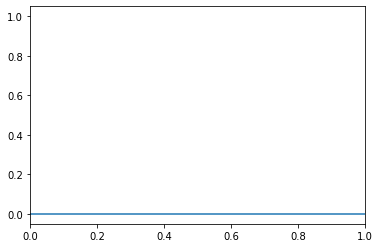

In [12]:
chroma_stft = js['chroma_stft']
plt.plot(chroma_stft[0])
plt.xlim(0, 1)
plt.show()
